import seaborn as sns
import matplotlib.pyplot as plt
import numpy as num
import pandas as pd

column_names = [ 'id', 'topic', 'sentiment', 'text']
file=r"C:\Users\Amukelani\Downloads\social_media\twitter_training.csv"
df=pd.read_csv(file,names=column_names)

# print(df.isnull().sum())
# df.describe()

df.dropna(inplace=True)
df.drop('id',axis=1,inplace=True)
print(df)
df.head()


In [5]:
df['sentiment'].value_counts().reset_index()

,sentiment,count
0,Negative,22358
1,Positive,20655
2,Neutral,18108
3,Irrelevant,12875


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))

def preprocessed_text(text):
    #take out any character that is not a letter ,lower case and upper case and any space
    re.sub(r'[^a-zA-Z\s]', '',text,re.I|re.A)
    

    #take out any character that is not a letter ,lower case and upper case and any space
    text=text.lower()
    tokens=text.split()

    tokens=[stemmer.stem(word) for word in tokens if word not in stop_words]
    return  ''.join(tokens)

df['preprocessed_text']=df['text'].apply(preprocessed_text)
print(df[['text','preprocessed _text']].head())




In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# take top 5000 most frequent word
vectorizer=TfidfVectorizer(max_features=8000)
x=vectorizer.fit_transform(df['preprocessed_text'])
y=df['sentiment']
print(x.shape,y.shape)



(73996, 8000) (73996,)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)


clf = DecisionTreeClassifier(criterion='gini',splitter = "random")
clf.fit(X_train,Y_train)

DecisionTreeClassifier(splitter='random')

0.5889454479931528


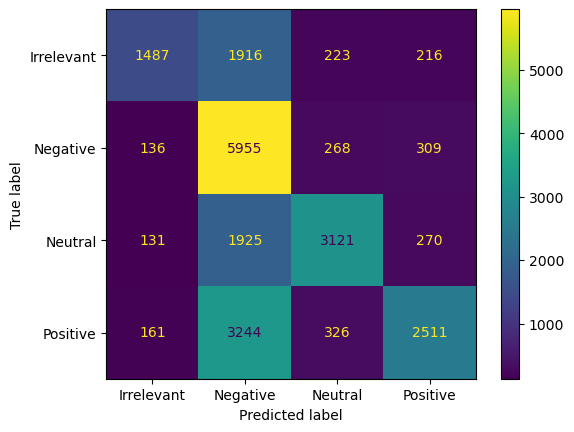

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
print(accuracy_score(Y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)

In [26]:
def predict_sentiment(text):
    preprocessed_text = preprocess_text(text)

    # Transform the preprocessed text into TF-IDF vectors
    X_new = vectorizer.transform([preprocessed_text])

    # Make predictions
    predicted_sentiment = clf.predict(X_new)

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)